***************************************************
TOTAL
Content:
           MD(ft)  PORO(v/v)  Permeability(mD)  RHOB(g/cm3)  DTS(us/ft)  \
0     4597.471739   0.000000               0.0     2.700700   75.056761   
1     4604.031739   0.087413               0.0     2.819380   85.369586   
2     4610.591739   0.000000               0.0     2.798909  124.121043   
3     4617.151739   0.059590               0.0     2.575396  114.571242   
4     4623.711739   0.000000               0.0     2.895991  145.921799   
...           ...        ...               ...          ...         ...   
1958  4684.875411   0.000000               0.0     2.461998    0.000000   
1959  4691.435411   0.000000               0.0     2.454321    0.000000   
1960  4697.995411   0.000000               0.0     2.539750    0.000000   
1961  4704.555411   0.000000               0.0     2.467592    0.000000   
1962  4711.115411   0.000000               0.0     2.536990    0.000000   

      DT(us/ft)  PEF(B/E)    RD(

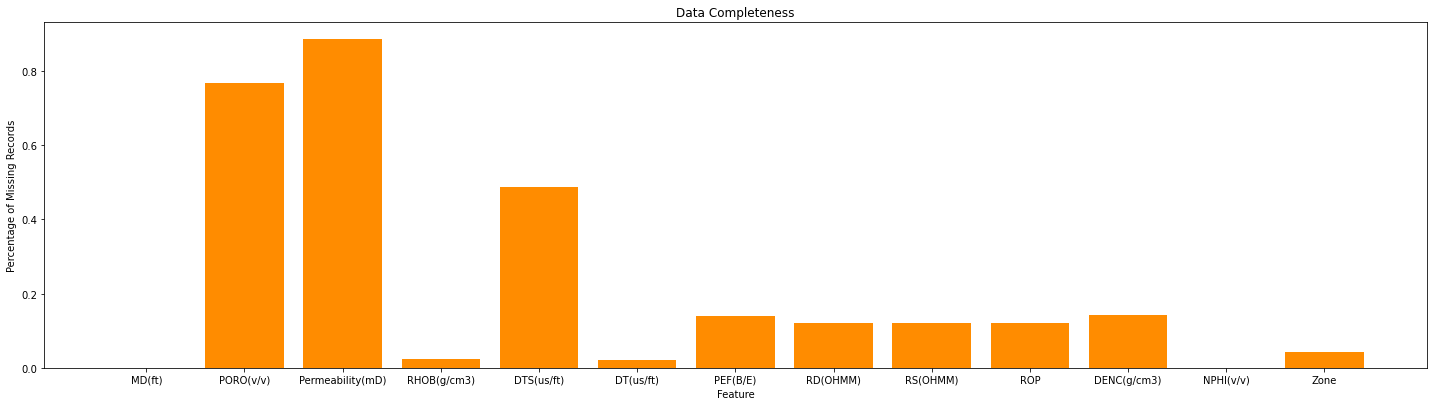




***************************************************
UPPER
Content:
           MD(ft)  PORO(v/v)  Permeability(mD)  RHOB(g/cm3)  DTS(us/ft)  \
0     4597.471739   0.000000               0.0     2.700700   75.056761   
1     4604.031739   0.087413               0.0     2.819380   85.369586   
2     4610.591739   0.000000               0.0     2.798909  124.121043   
3     4617.151739   0.059590               0.0     2.575396  114.571242   
4     4623.711739   0.000000               0.0     2.895991  145.921799   
...           ...        ...               ...          ...         ...   
1949  4625.835411   0.000000               0.0     2.520312    0.000000   
1950  4632.395411   0.000000               0.0     2.485050    0.000000   
1951  4638.955411   0.000000               0.0     2.485519    0.000000   
1952  4645.515411   0.000000               0.0     2.498463    0.000000   
1953  4652.075411   0.000000               0.0     2.492106    0.000000   

      DT(us/ft)  PEF(B/E)    

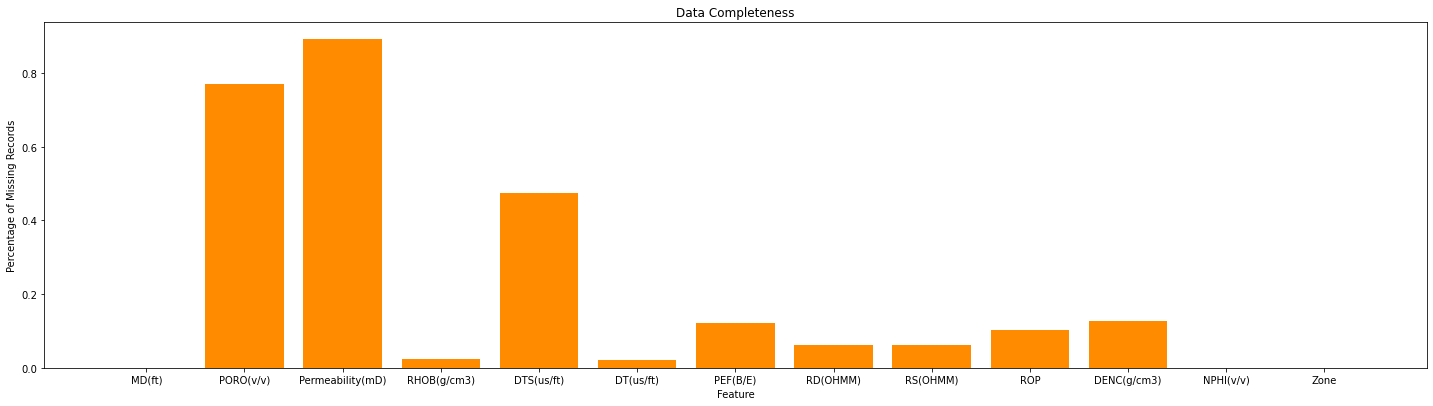




***************************************************
LOWER
Content:
           MD(ft)  PORO(v/v)  Permeability(mD)  RHOB(g/cm3)  DTS(us/ft)  \
20    4728.671739   0.000000               0.0     2.774557  117.930158   
21    4735.231739   0.039011               0.0     2.987620  142.009713   
22    4741.791739   0.000000               0.0     2.487658  128.272084   
23    4748.351739   0.205777               0.0     2.281150  145.449109   
24    4754.911739   0.000000               0.0     2.282653  145.096993   
...           ...        ...               ...          ...         ...   
1958  4684.875411   0.000000               0.0     2.461998    0.000000   
1959  4691.435411   0.000000               0.0     2.454321    0.000000   
1960  4697.995411   0.000000               0.0     2.539750    0.000000   
1961  4704.555411   0.000000               0.0     2.467592    0.000000   
1962  4711.115411   0.000000               0.0     2.536990    0.000000   

      DT(us/ft)   PEF(B/E)   

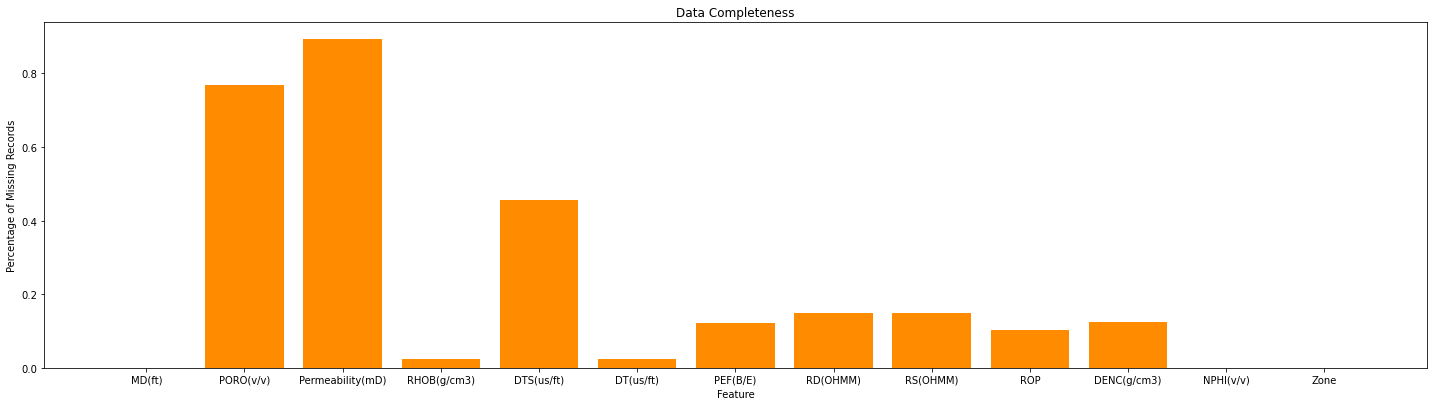

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


def split_upper_lower(df, column_names):
    upper_lower = [df, 0, 0]
    zone = column_names[12]
    upper_lower[1] = df[df[zone] == 'Upper']
    upper_lower[2] = df[df[zone] == 'Lower']
    return upper_lower


# Code modified from https://thispointer.com/count-number-of-zeros-in-pandas-dataframe-column/
# Replace -999 with 0 and count how many times it appears per column
def count_and_replace(df, column):
    nan_count = 0
    if column != 'Zone':
        df.loc[df[column] < -990, column] = -999
    if -999 in set(df[column]):
        nan_count = df[column].value_counts()[-999]
    df[column] = df[column].replace(-999, 0)
    return nan_count


def plot_nan_frequencies(df, column_names, nan_count_list):
    nan_percents = []
    for col in range(len(nan_count_list)):
        nan_percents.append(nan_count_list[col]/len(df))
        
    plt.bar(column_names, nan_percents, color = 'darkorange', align = 'center') 
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2)
    plt.title('Data Completeness') 
    plt.ylabel('Percentage of Missing Records') 
    plt.xlabel('Feature')  
    plt.show()


def read_well_logs():

    # Code modified from https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
    # use glob to get all the csv files in the folder
    path = str(os.getcwd()) + '/Well_Log'
    joined_csv = glob.glob(os.path.join(path, "WP*.csv"))

    df = pd.concat(map(pd.read_csv, joined_csv), ignore_index=True)

    # Code copied from https://www.geeksforgeeks.org/iterating-over-rows-and-columns-in-pandas-dataframe/
    column_names = df.columns.values.tolist()
    upper_lower = split_upper_lower(df, column_names)

    for zone in range(len(upper_lower)):
        print('***************************************************')
        if zone == 0:
            print('TOTAL')
        elif zone == 1:
            print('UPPER')
        else:
            print('LOWER')

        nan_count_list = []
        for column in column_names:
            nan_count = count_and_replace(upper_lower[zone], column)
            nan_count_list.append(nan_count)
    
        # print the content
        print('Content:')
        print(upper_lower[zone])

        for idx in range(len(column_names)):
            if nan_count_list[idx] != 0:
                print(column_names[idx], '--- nan count:', nan_count_list[idx])
        
        print()
        print(upper_lower[zone].describe().T)
        print(path)
        plot_nan_frequencies(upper_lower[zone], column_names, nan_count_list)
        print()
        print() 
        print()   


def main():
    read_well_logs()


if __name__ == '__main__':
    main()